<h2 style="color:#3a80f2">Understanding Images</h2>
<p> </p>
<div> Looking at images with similar properties from different classes</div>
<div> in order to better understand how metastasis appear in our images</div>
<p></p>

<div>Things we wish to learn: 
    <ul>
        <li>Does information outside the bounding box can help? (cropping size)</li>
        <li>Does orientation matter? (augemting with rotations)</li>
        <li>Are the patterns global or local (architecture search)</li>
        <li>Are the patterns big or small (convolution sizes)</li>
    </ul>
</div>

In [40]:
from image_utils import ReviewImages
import configparser
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [3]:
config = configparser.ConfigParser()
config.read_file(open(r'config.txt'))

TRAIN_PATH = config.get('PATHS', 'TRAIN_PATH')
LABELS_PATH = config.get('PATHS', 'LABELS_PATH')


<h3 style="color:#3a80f2">1. Get Image Statistics</h3>
<p> </p>
<div> Create a DataFrame with some attributes each image has</div>


In [4]:
img_class = ReviewImages(TRAIN_PATH, LABELS_PATH)

In [5]:
img_class.img_df.head()

,id,label,energy,r_energy,g_energy,b_energy,mean,std
0,f38a6374c348f90b587e046aac6079959adf3835,0,2816444.0,788689.0,941280.0,1086475.0,232.890119,34.032193
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1,2374356.0,654587.0,847741.0,872028.0,226.555773,45.385986
2,755db6279dae599ebb4d39a9123cce439965282d,0,2899661.0,924355.0,1020671.0,954635.0,172.537435,56.258812
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0,2990777.0,1014167.0,992252.0,984358.0,179.904695,47.459848
4,068aba587a4950175d04c680d38943fd488d6a9d,0,2981245.0,982142.0,1002905.0,996198.0,115.152814,57.389674


<h3 style="color:#3a80f2">2. Distributions</h3>
<p> </p>
<div>See how the different statistics we collected are distributed in the different classes</div>

In [7]:
img_df = img_class.img_df

<h4 style="color:#3a80f2"> A. Image Energy </h4>

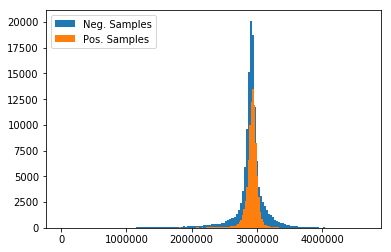

In [8]:
plt.hist(img_df.energy[img_df.label == 0], 
         bins=150, label='Neg. Samples')
plt.hist(img_df.energy[img_df.label == 1], 
         bins=150, label='Pos. Samples')
plt.legend(loc='upper left')
plt.show()

<div>Conclusion: Both have normal distribution with similiar mean but different std.</div>
<div>Compare samples with the amount of energy of mean(pos_samples) +/- 1 std(pos_samples)</div>

In [47]:
# get lower and upper bound:
pos_mean = img_df[img_df.label == 1]['energy'].mean(axis=0)
pos_std = img_df[img_df.label == 1]['energy'].std(axis=0)
l_bound = pos_mean - 1 * pos_std
h_bound = pos_mean + 1 * pos_std

# get ids that corresponds to these bounds
one_std_df = img_df[img_df.energy.between(l_bound, h_bound)]
print('Positive images rate: ', 100 * one_std_df[one_std_df.label == 1].shape[0] / one_std_df.shape[0], '%')

Positive images rate:  45.68967439785906 %


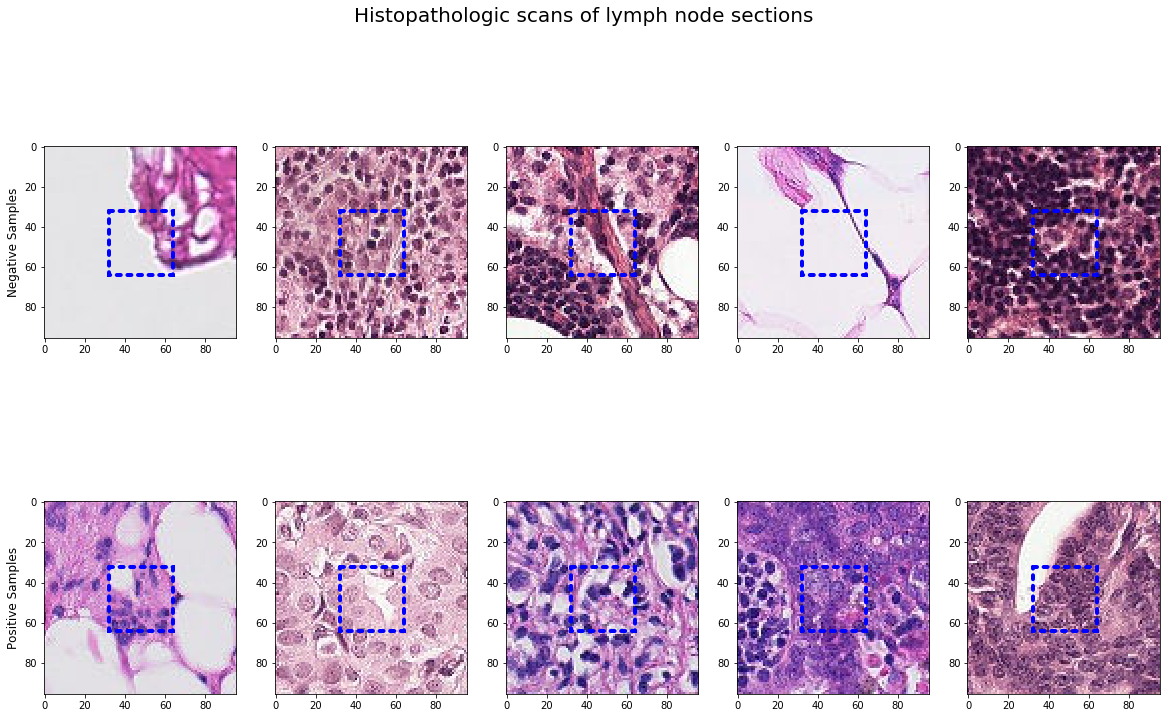

In [50]:
# show images:
shuf_one_std_df = shuffle(one_std_df)
negative_list = shuf_one_std_df[shuf_one_std_df.label == 0]['id'].values.tolist()[0:5]
positive_list = shuf_one_std_df[shuf_one_std_df.label == 1]['id'].values.tolist()[0:5]

img_class.compare_images(negative_list, positive_list)

<div>Looks like energy in RGB images is not that helpful to see differences</div>

<h4 style="color:#3a80f2"> B. Image Red Energy </h4>

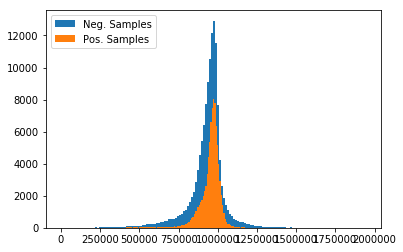

In [51]:
plt.hist(img_df.r_energy[img_df.label == 0], 
         bins=150, label='Neg. Samples')
plt.hist(img_df.r_energy[img_df.label == 1], 
         bins=150, label='Pos. Samples')
plt.legend(loc='upper left')
plt.show()

In [52]:
# get lower and upper bound:
pos_mean = img_df[img_df.label == 1]['r_energy'].mean(axis=0)
pos_std = img_df[img_df.label == 1]['r_energy'].std(axis=0)
l_bound = pos_mean - 1 * pos_std
h_bound = pos_mean + 1 * pos_std

# get ids that corresponds to these bounds
one_std_df = img_df[img_df.r_energy.between(l_bound, h_bound)]
print('Positive images rate: ', 100 * one_std_df[one_std_df.label == 1].shape[0] / one_std_df.shape[0], '%')

Positive images rate:  44.4174959279999 %


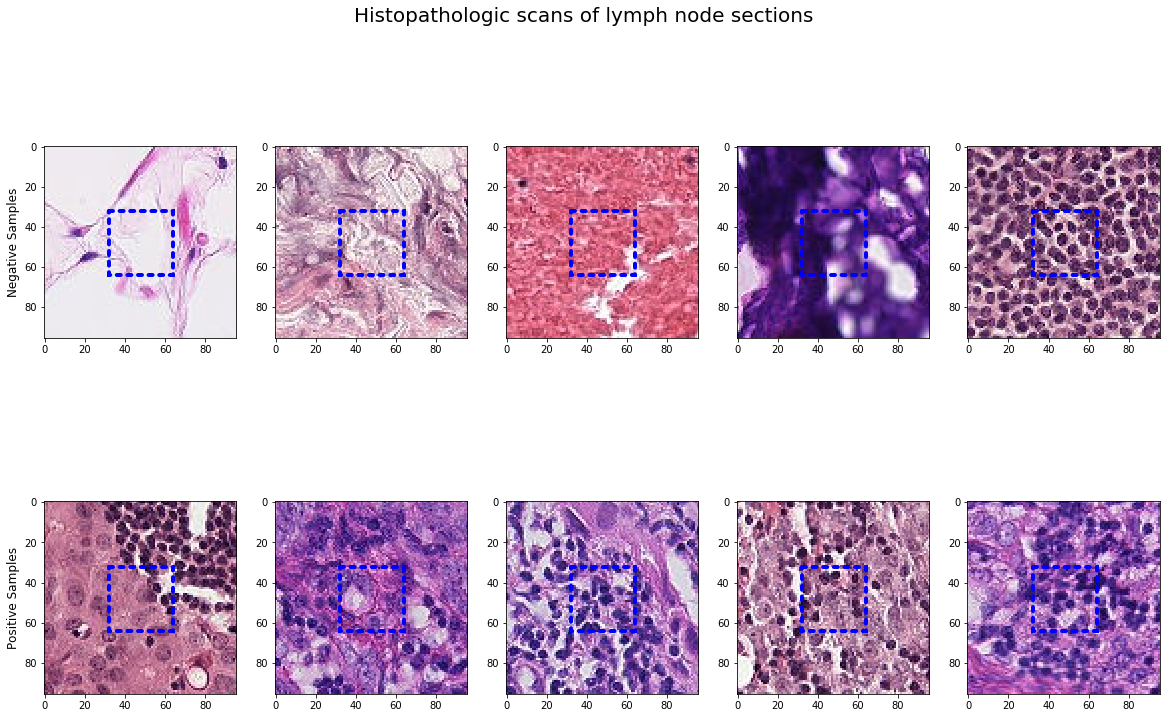

In [54]:
shuf_one_std_df = shuffle(one_std_df)
negative_list = shuf_one_std_df[shuf_one_std_df.label == 0]['id'].values.tolist()[0:5]
positive_list = shuf_one_std_df[shuf_one_std_df.label == 1]['id'].values.tolist()[0:5]

img_class.compare_images(negative_list, positive_list)

<h4 style="color:#3a80f2"> C. Image Green Energy </h4>

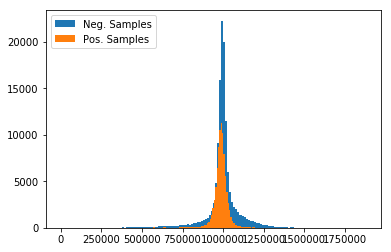

In [56]:
plt.hist(img_df.g_energy[img_df.label == 0], 
         bins=150, label='Neg. Samples')
plt.hist(img_df.g_energy[img_df.label == 1], 
         bins=150, label='Pos. Samples')
plt.legend(loc='upper left')
plt.show()

In [57]:
# get lower and upper bound:
pos_mean = img_df[img_df.label == 1]['g_energy'].mean(axis=0)
pos_std = img_df[img_df.label == 1]['g_energy'].std(axis=0)
l_bound = pos_mean - 1 * pos_std
h_bound = pos_mean + 1 * pos_std

# get ids that corresponds to these bounds
one_std_df = img_df[img_df.g_energy.between(l_bound, h_bound)]
print('Positive images rate: ', 100 * one_std_df[one_std_df.label == 1].shape[0] / one_std_df.shape[0], '%')

Positive images rate:  45.510563892493266 %


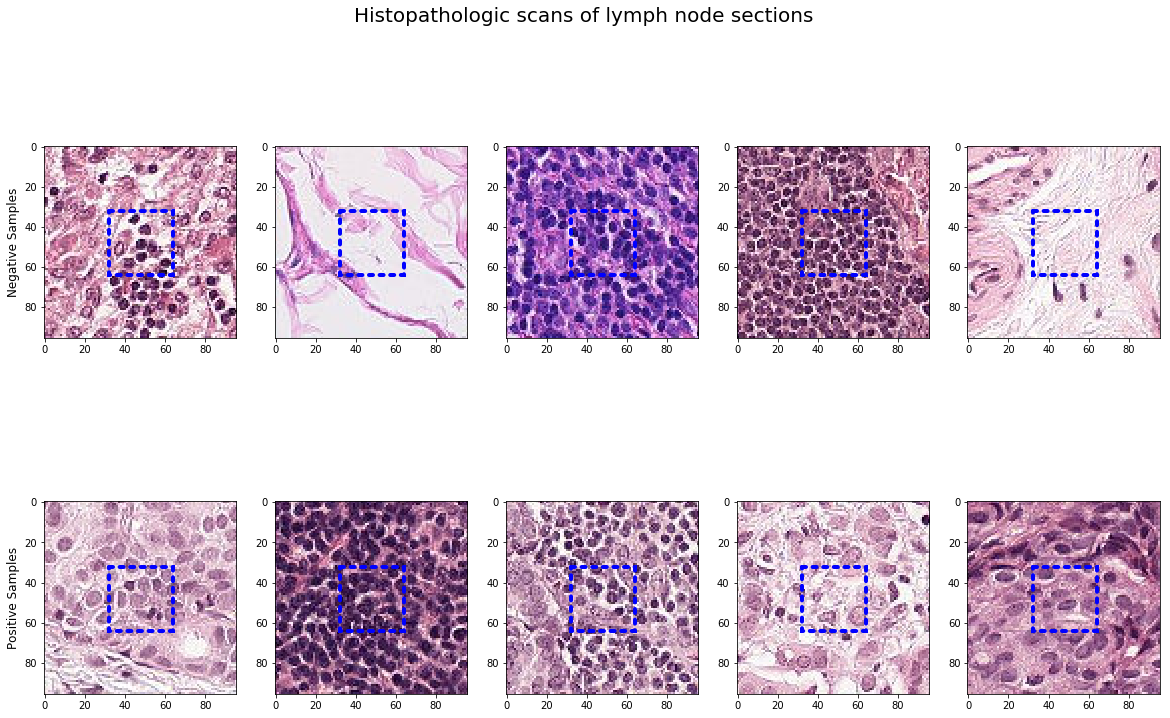

In [58]:
shuf_one_std_df = shuffle(one_std_df)
negative_list = shuf_one_std_df[shuf_one_std_df.label == 0]['id'].values.tolist()[0:5]
positive_list = shuf_one_std_df[shuf_one_std_df.label == 1]['id'].values.tolist()[0:5]

img_class.compare_images(negative_list, positive_list)

<h4 style="color:#3a80f2"> D. Image Blue Energy </h4>

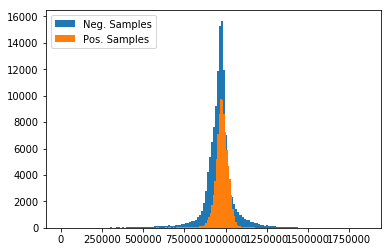

In [60]:
plt.hist(img_df.b_energy[img_df.label == 0], 
         bins=150, label='Neg. Samples')
plt.hist(img_df.b_energy[img_df.label == 1], 
         bins=150, label='Pos. Samples')
plt.legend(loc='upper left')
plt.show()

In [61]:
# get lower and upper bound:
pos_mean = img_df[img_df.label == 1]['b_energy'].mean(axis=0)
pos_std = img_df[img_df.label == 1]['b_energy'].std(axis=0)
l_bound = pos_mean - 1 * pos_std
h_bound = pos_mean + 1 * pos_std

# get ids that corresponds to these bounds
one_std_df = img_df[img_df.b_energy.between(l_bound, h_bound)]
print('Positive images rate: ', 100 * one_std_df[one_std_df.label == 1].shape[0] / one_std_df.shape[0], '%')

Positive images rate:  46.86335559056693 %


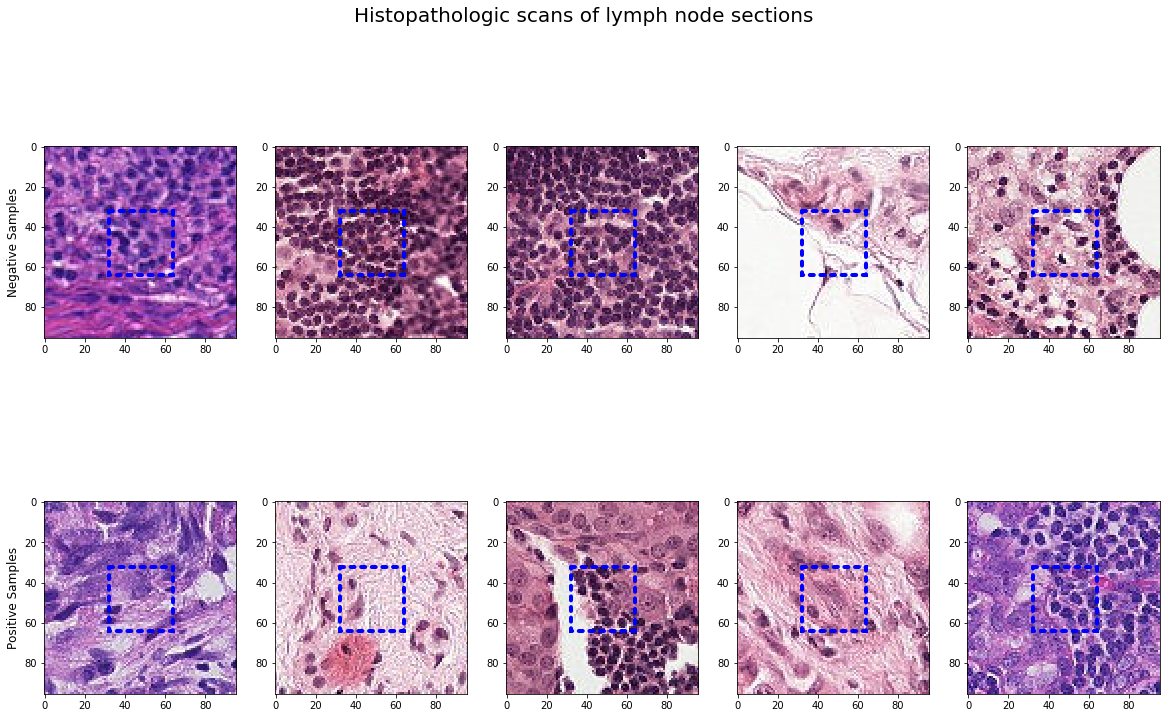

In [62]:
shuf_one_std_df = shuffle(one_std_df)
negative_list = shuf_one_std_df[shuf_one_std_df.label == 0]['id'].values.tolist()[0:5]
positive_list = shuf_one_std_df[shuf_one_std_df.label == 1]['id'].values.tolist()[0:5]

img_class.compare_images(negative_list, positive_list)

<div>Some Conclusions:
    <ol>
        <li>Weird shaped purple particles seem to be more present at the positive samples:
            <ul>
                <li>Can be in many poses. That means rotation and flipping are important</li>
                <li>Proper convolution size can be 3X3 or 5X5</li>
                <li>Information outside bounding box present the area inside. Helpful to crop outside of bounding box</li>
            </ul>
        </li>
        <li>Big white chunks surronded by red ones seems indicative:
        <ul>
            <li>Perhaps bigger (7X7) convolutions can help</li>
            <li>Seems that no global patterns exit only local ones in varying sizes</li>
        </ul>
        </li>
    </ol>
</div>
<p></p>
<div style="color:#3a80f2"><strong>Worth considering Inception models for this problem</strong></div>